In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 10)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'China'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without China' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [22]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>2500]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [23]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [24]:
len(Last_day_df)

37

In [27]:
Important_countries = ['India', 'World', 'World without China',
                      'US', 'Italy', 'Spain', 'China',
                      'United Kingdom',# 'Ireland', 'Norway',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date')
                        for country in Important_countries}

In [28]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,82511,2020-04-03,3326,76760,80086,2425,0.041530,0.029390
India,2567,2020-04-03,72,192,264,2303,0.272727,0.897156
Iran,53183,2020-04-03,3294,17935,21229,31954,0.155165,0.600831
Italy,119827,2020-04-03,14681,19758,34439,85388,0.426290,0.712594
"Korea, South",10062,2020-04-03,174,6021,6195,3867,0.028087,0.384317
Spain,119199,2020-04-03,11198,30513,41711,77488,0.268466,0.650073
US,275586,2020-04-03,7087,9707,16794,258792,0.421996,0.939061
United Kingdom,38689,2020-04-03,3611,208,3819,34870,0.945535,0.901290
World,1095917,2020-04-03,58787,225796,284583,811334,0.206572,0.740324


In [29]:
def plotwithx(x):
    for col in C:
        if col!=x:
            plt.figure(figsize = (17, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in C[:-2]:
                plt.xscale('log')

            if col not in ['Mortality', 'Part_Active']:
                plt.yscale('log')
            for cun in DF_Dict:
                df = DF_Dict[cun]
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                        df[col],
                        label = cun,
                        linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-'
                        )
            plt.legend(DF_Dict.keys())
            plt.plot()


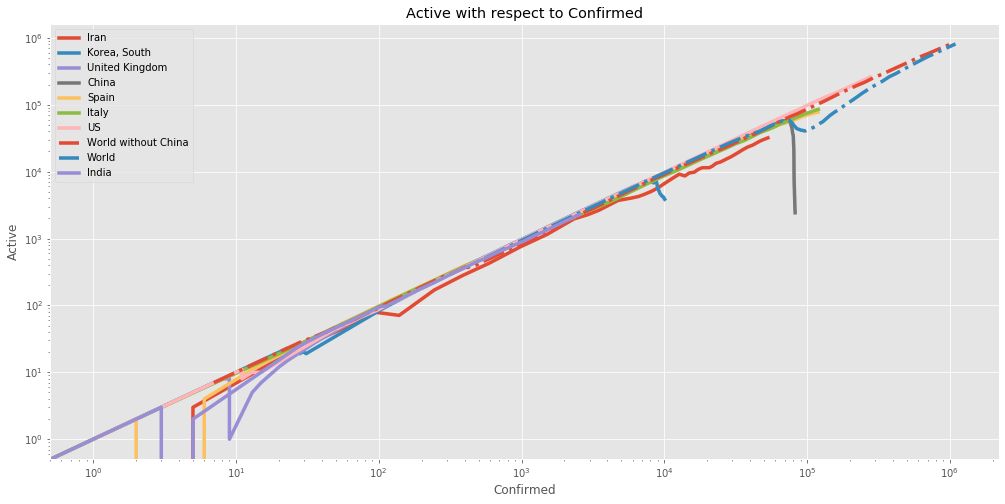

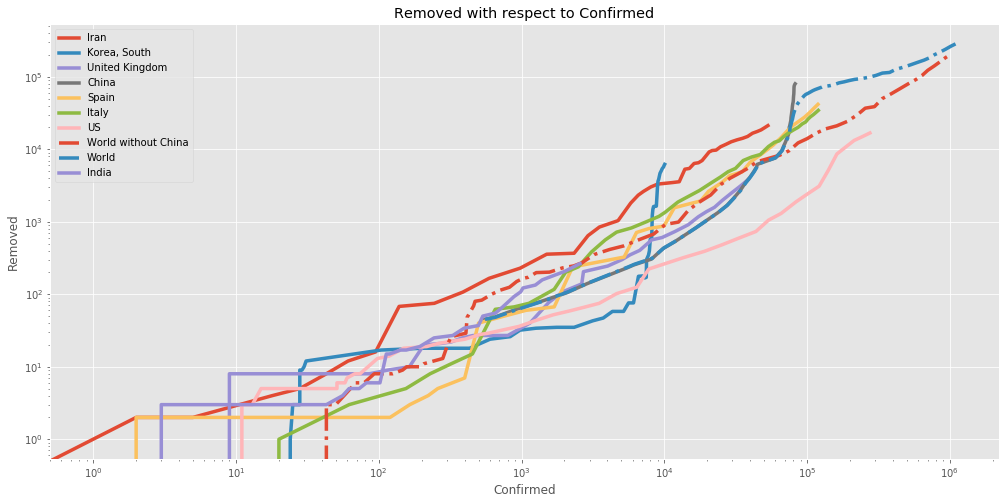

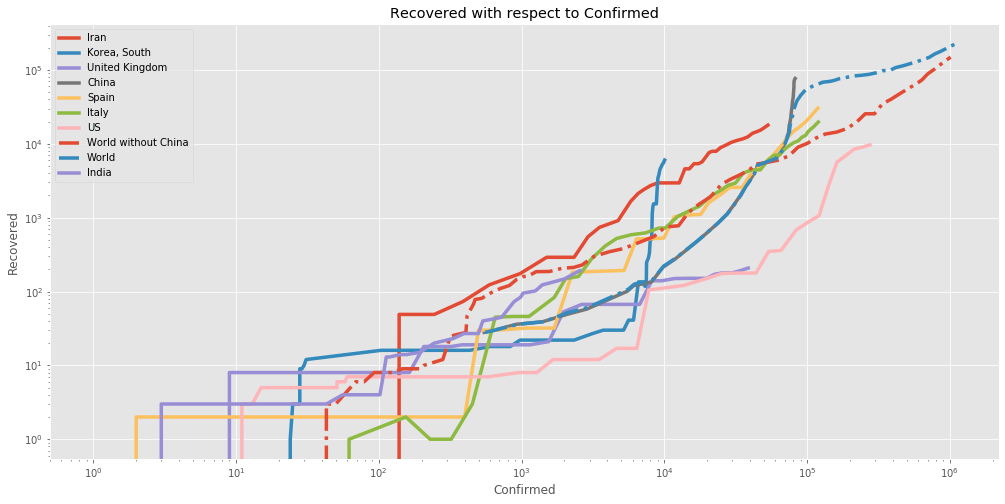

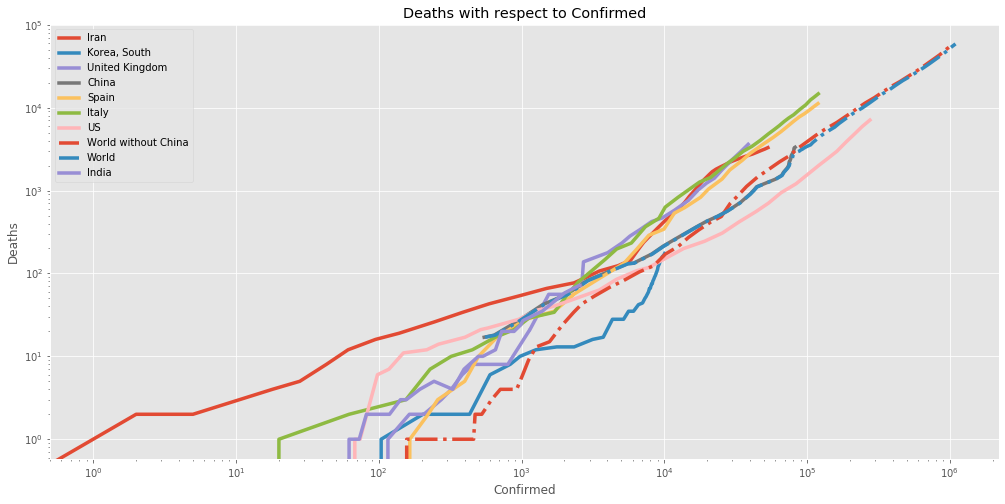

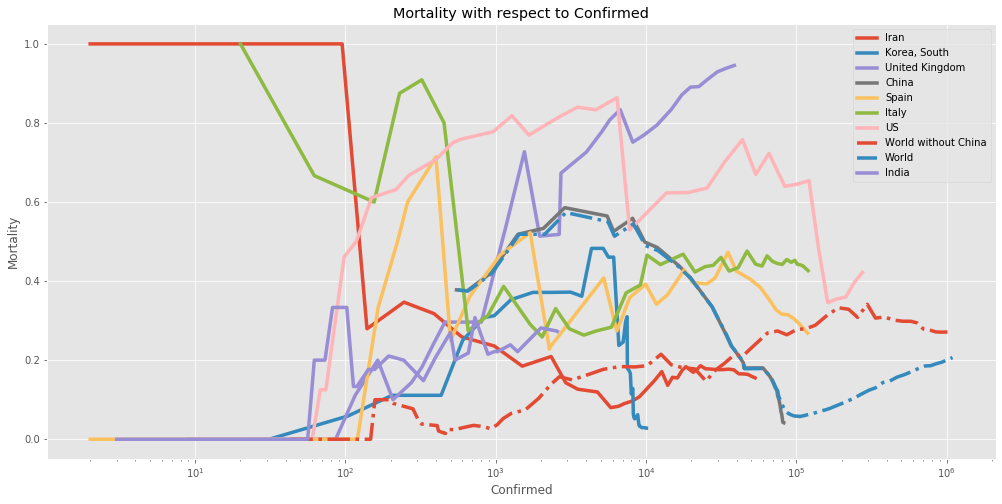

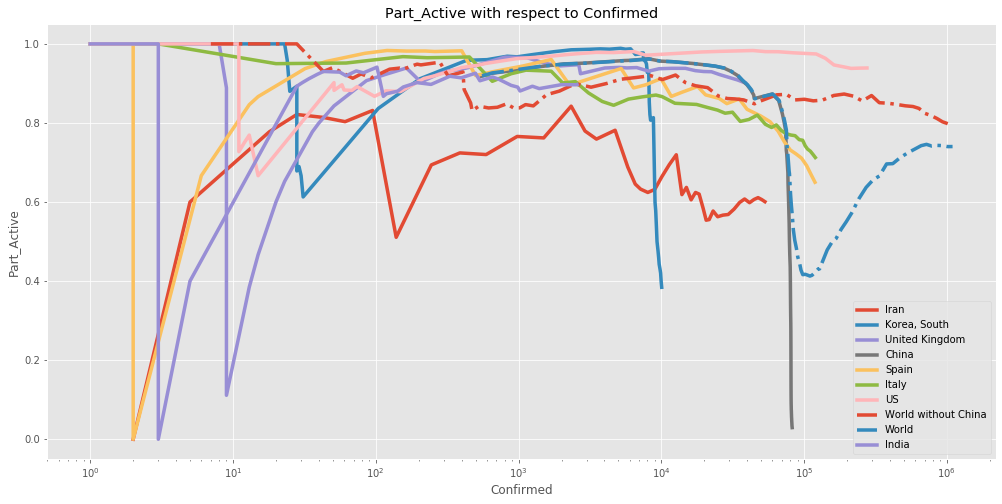

In [30]:
plotwithx('Confirmed')

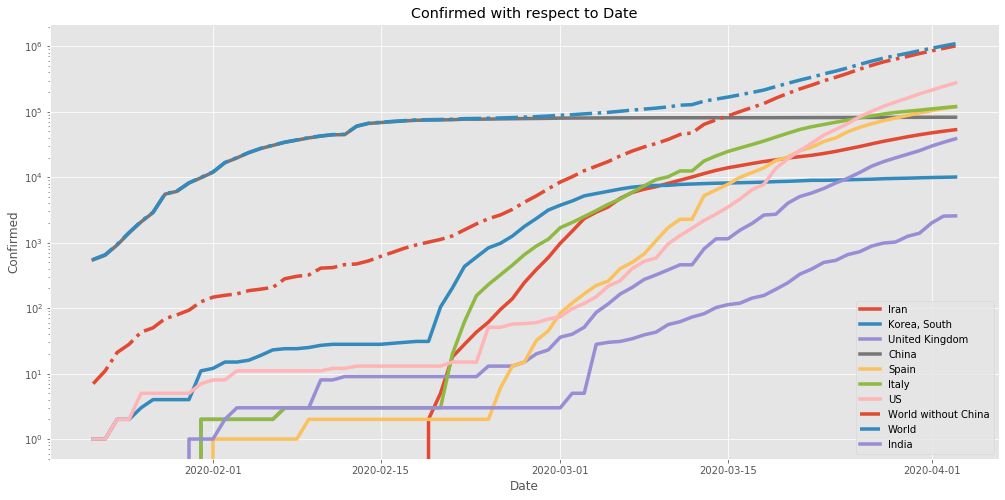

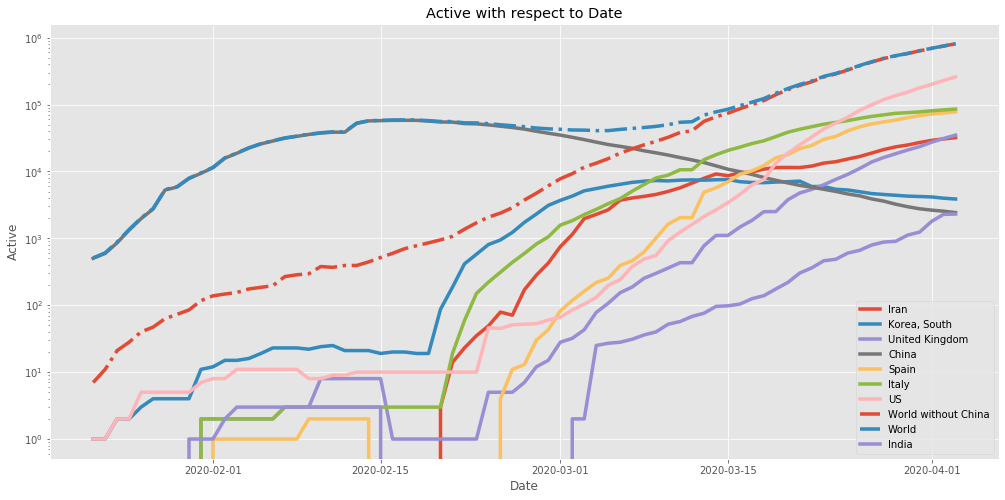

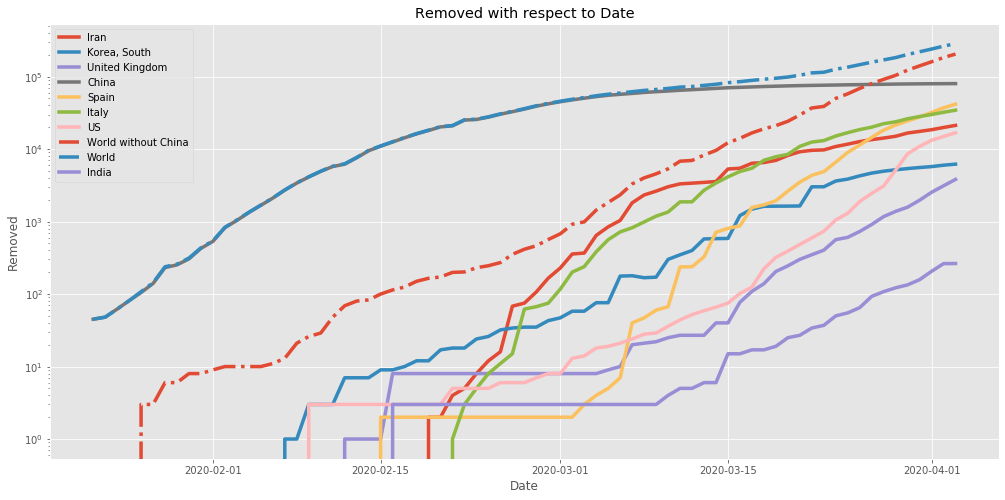

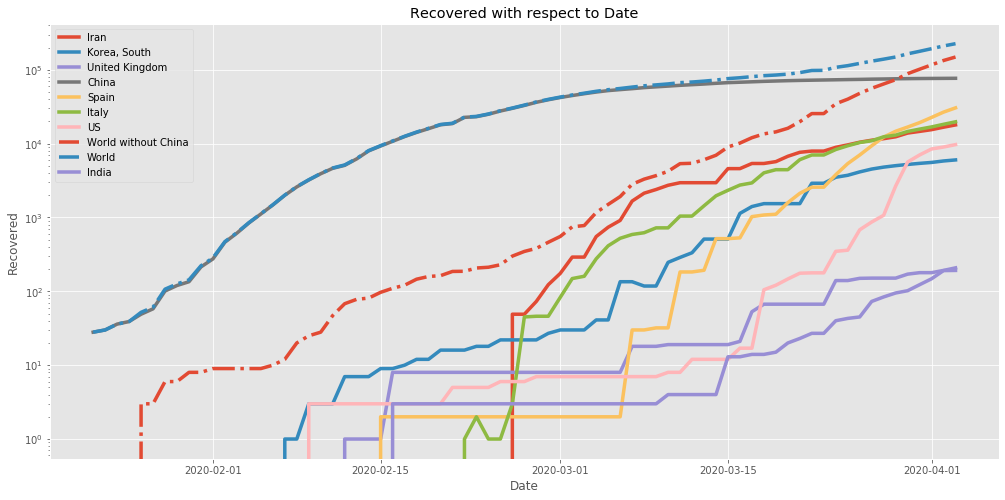

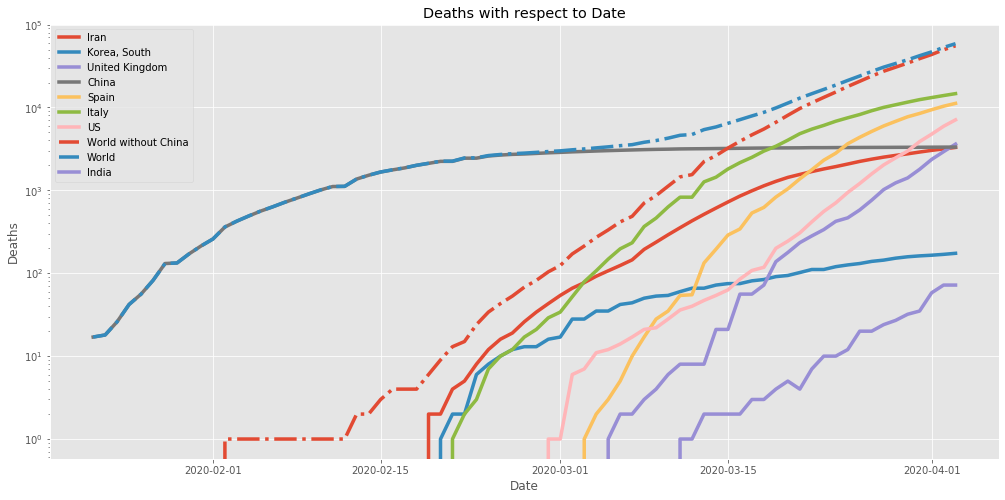

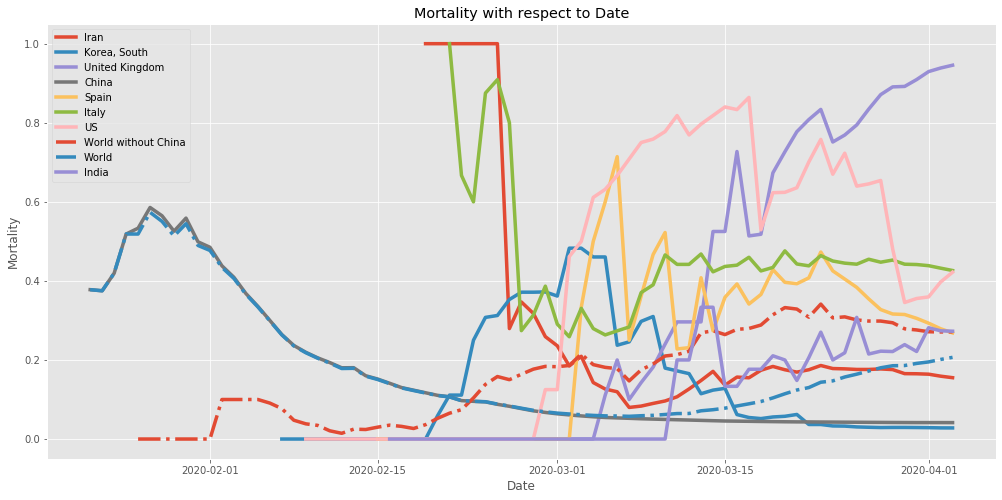

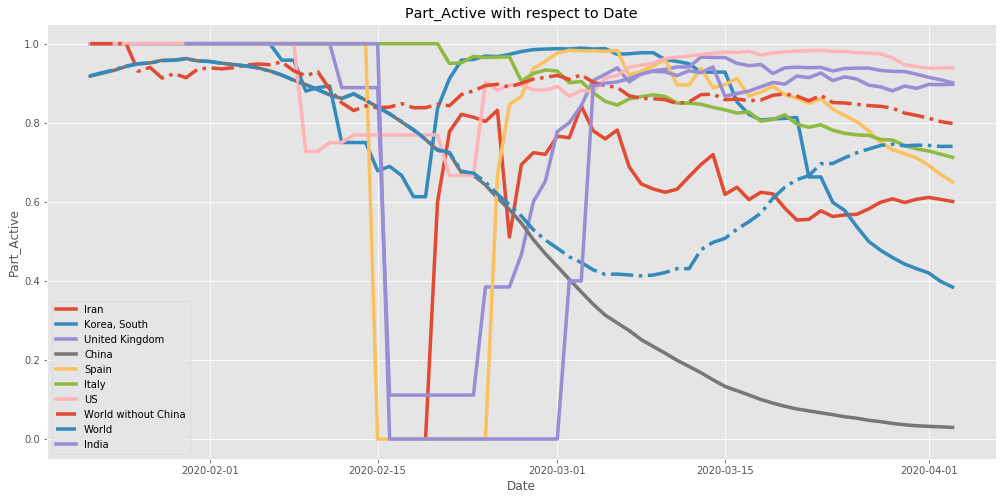

In [34]:
plotwithx('Date')

In [32]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,5370,2020-04-03,59,32,91,5279,0.648352,0.983054
Ireland,4273,2020-04-03,120,5,125,4148,0.960000,0.970747
Czechia,4091,2020-04-03,53,72,125,3966,0.424000,0.969445
Portugal,9886,2020-04-03,246,68,314,9572,0.783439,0.968238
Poland,3383,2020-04-03,71,56,127,3256,0.559055,0.962459
Turkey,20921,2020-04-03,425,484,909,20012,0.467547,0.956551
Brazil,9056,2020-04-03,359,127,486,8570,0.738683,0.946334
Israel,7428,2020-04-03,40,403,443,6985,0.090293,0.940361
US,275586,2020-04-03,7087,9707,16794,258792,0.421996,0.939061


In [33]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
"Korea, South",10062,2020-04-03,174,6021,6195,3867,0.028087,0.384317
Australia,5330,2020-04-03,28,649,677,4653,0.041359,0.872983
China,82511,2020-04-03,3326,76760,80086,2425,0.041530,0.029390
Chile,3737,2020-04-03,22,427,449,3288,0.048998,0.879850
Germany,91159,2020-04-03,1275,24575,25850,65309,0.049323,0.716430
Luxembourg,2612,2020-04-03,31,500,531,2081,0.058380,0.796708
Malaysia,3333,2020-04-03,53,827,880,2453,0.060227,0.735974
Canada,12437,2020-04-03,179,2175,2354,10083,0.076041,0.810726
Austria,11524,2020-04-03,168,2022,2190,9334,0.076712,0.809962
